In [1]:
#подключение библиотек
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#импорт базы данных с keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [3]:
#прописываем имена классов
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [28]:
#обучающий набор - 60 000 изображений (28 Х 28 пикселей)
train_images.shape
print(len(train_labels))
#тестовый набор - 10 000 изображений (28 Х 28 пикселей)
test_images.shape 
print(len(test_labels))

#каждая метка представляет собой целое число от 0 до 9 (Показывается первые 3 метки и последние 3 метки)
train_labels 

60000
10000


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

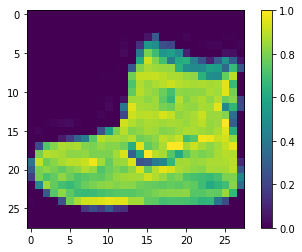

In [47]:
#обработка: значения пикселей находятся в диапазоне от 0 до 255:

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [6]:
#масштабируем эти значения до диапазона от 0 до 1:

train_images = train_images / 255.0
test_images = test_images / 255.0

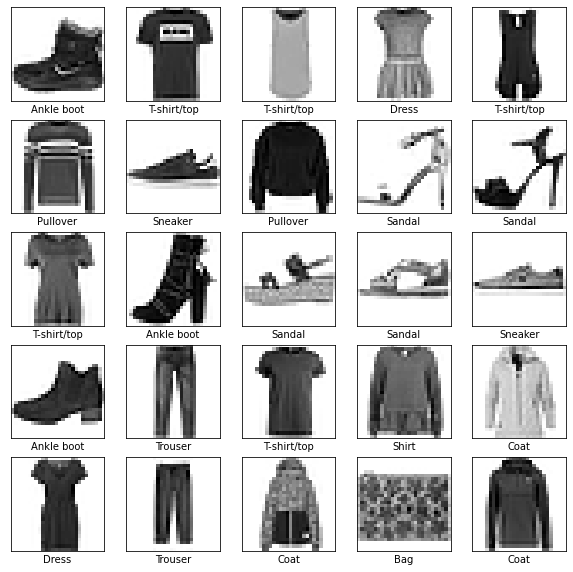

In [7]:
#первые 25 изображений из тренировочного набора с названиями классов

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])


ПОСТРОЕНИЕ МОДЕЛИ


In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


СКОМПИЛИРОВАНИЕ МОДЕЛИ


In [11]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


ОБУЧЕНИЕ МОДЕЛИ


In [12]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6317 - accuracy: 0.7802
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3910 - accuracy: 0.8582
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3410 - accuracy: 0.8758
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3199 - accuracy: 0.8835
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2963 - accuracy: 0.8894


ОЦЕНКА ТОЧНОСТИ

In [13]:
#определение точности на тестовом наборе данных
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3490 - accuracy: 0.8737
Test accuracy: 0.8737000226974487


ПРОГНОЗИРОВАНИЕ

In [14]:
#модель для прогнозирования некоторых изображений
predictions = model.predict(test_images)

In [15]:
#прогнозируем принадлежность 0-ого изображения из тестового набора данных
predictions[0]

array([9.2945629e-06, 2.2108187e-08, 4.9366673e-08, 1.0287951e-08,
       1.6368739e-07, 1.9326694e-02, 6.7490371e-05, 1.8496584e-02,
       1.1400629e-05, 9.6208835e-01], dtype=float32)

In [16]:
#запрашиваем класс, с наибольшей вероятностью
np.argmax(predictions[0]) #9

9

In [17]:
#проверяем к какому классу относится 1-ое изображение
#убежаемся в правильности работы прогнозирования
test_labels[0]

9

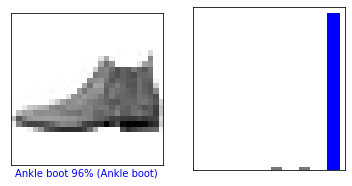

In [19]:
#def-ы для визуального представления прогнозирования
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#визуальный отчет по 0-ому изображению
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

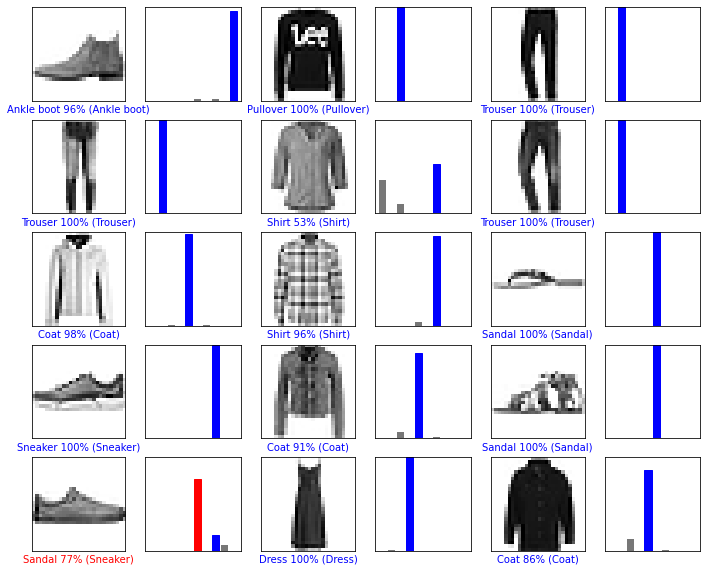

In [20]:
#визуальный отчет первых 15-ти изображений
#правильные прогнозы - СИНЕГО ЦВЕТА, неправильные - КРАСНОГО
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [21]:
#применение на практике обученной модели
#создаем переменную и кладем в нее 0-ое изображение из тестового набора
img = test_images[0]

In [22]:
#добавим изображение в пакет, где он является единственным членом
img = (np.expand_dims (img, 0))

In [23]:
#прогноз
predictions_single = model.predict(img)
print(predictions_single)

[[9.2945629e-06 2.2108187e-08 4.9366580e-08 1.0287931e-08 1.6368739e-07
  1.9326644e-02 6.7490371e-05 1.8496571e-02 1.1400607e-05 9.6208835e-01]]


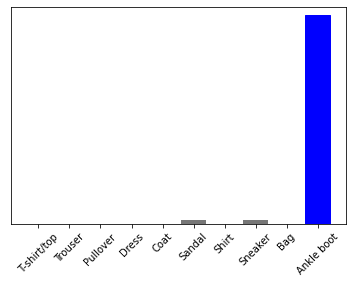

In [24]:
#визуальный отчет
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [25]:
np.argmax(predictions_single[0])

9